# Section 1: Business understanding

The purpose of this project is to gain insights into the programming language preferences and the relationship between programming languages, developer experience, and compensation among developers using Stack Overflow's 2023 Developer Survey data.

### Question 1: What are the common combinations of programming languages, database environments, and cloud platforms (Platform) that developers use together in their development work? 

### Question 2: Which programming languages are the most popular among developers who have been coding for more than 5 years, have  development experience past year, and are interested in continuing to work with those languages in the next year?

### Question 3: Do developers who work with more programming language earn more?

### Question 4: Can we predict a developer's annual compensation  based on their preferred programming languages , years of professional coding experience, and the size of the organization they work for?

## Importing files and data exploration

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings("ignore")




# Section 2: Data understanding

In [3]:
df = pd.read_csv('C:/Udacity/sosurvey/survey_results_public.csv')  

In [4]:
col_desc = pd.read_csv('C:/Udacity/sosurvey/survey_results_schema.csv')
col_desc

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [5]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [508]:
df.shape

(89184, 84)

In [8]:
#Let's check the null values of each column

round(df.isnull().mean()*100,2)

ResponseId                              0.00
Q120                                    0.00
MainBranch                              0.00
Age                                     0.00
Employment                              1.44
RemoteWork                             17.24
CodingActivities                       17.29
EdLevel                                 1.36
LearnCode                               1.71
LearnCodeOnline                        21.42
LearnCodeCoursesCert                   58.43
YearsCode                               1.96
YearsCodePro                           25.84
DevType                                13.81
OrgSize                                27.07
PurchaseInfluence                      27.16
TechList                               31.77
BuyNewTool                              6.92
Country                                 1.36
Currency                               26.74
CompTotal                              45.93
LanguageHaveWorkedWith                  2.29
LanguageWa

In [37]:
#Let's look at the information which developers didn't or couln't answer
no_answer = [print(f"Null percentage of column {i} is {round(df[i].isnull().mean()*100,2)}%") 
             for i in df if df[i].isnull().mean() > 0.8]

Null percentage of column AINextVery different is 85.8%
Null percentage of column AINextNeither different nor similar is 92.6%
Null percentage of column AINextSomewhat similar is 93.01%
Null percentage of column AINextVery similar is 97.06%


Interesting! I want to look at the meaning of these columns

In [38]:
#Function to get the description of column

def get_description(column_name, col_desc=col_desc):
    '''
    INPUT - col_desc - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(col_desc[col_desc['qname'] == column_name]['question'])[0]
    return desc


In [39]:
get_description('AINext',col_desc)

'Thinking about how your workflow and process changes over time, how similar or different do you anticipate your workflow to be 1 year from now as a result of AI tools you are currently using?'

Interesting! Although AI tools getting popular among developers, they may still not have a clear anticipation or expectation regarding how their workflow and processes will change in the future as a result of them.

In [40]:
#Let's look at the data types in dataframe
df.dtypes

ResponseId                               int64
Q120                                    object
MainBranch                              object
Age                                     object
Employment                              object
RemoteWork                              object
CodingActivities                        object
EdLevel                                 object
LearnCode                               object
LearnCodeOnline                         object
LearnCodeCoursesCert                    object
YearsCode                               object
YearsCodePro                            object
DevType                                 object
OrgSize                                 object
PurchaseInfluence                       object
TechList                                object
BuyNewTool                              object
Country                                 object
Currency                                object
CompTotal                              float64
LanguageHaveW

As we can see, most of our data consists of categorical variables

It is interesting that YearsCodePro is categorical variable. Let's explore that column

In [41]:
df['YearsCodePro'].value_counts()

5                     4792
10                    4594
2                     4464
3                     4378
4                     3970
6                     3637
7                     3509
8                     3462
15                    2789
1                     2596
12                    2398
20                    2227
9                     2145
11                    2013
Less than 1 year      1836
13                    1690
25                    1449
16                    1278
14                    1256
18                    1212
17                    1146
23                    1112
30                     924
22                     845
24                     686
19                     649
21                     565
27                     490
26                     486
35                     462
28                     417
40                     329
32                     293
33                     264
29                     217
36                     200
31                     187
3

Column mainly consists of numeric variables besides 2 values (Less than 1 year, More than 50 years). I am planning to use this column as numeric column, so we will come back to this later in data preparation stage

In [42]:
#I want to check if there are empty cells besides NaN values
for i in df:
    print(f"{i} : {(df[i] == ' ').sum()}")

ResponseId : 0
Q120 : 0
MainBranch : 0
Age : 0
Employment : 0
RemoteWork : 0
CodingActivities : 0
EdLevel : 0
LearnCode : 0
LearnCodeOnline : 0
LearnCodeCoursesCert : 0
YearsCode : 0
YearsCodePro : 0
DevType : 0
OrgSize : 0
PurchaseInfluence : 0
TechList : 0
BuyNewTool : 0
Country : 0
Currency : 0
CompTotal : 0
LanguageHaveWorkedWith : 0
LanguageWantToWorkWith : 0
DatabaseHaveWorkedWith : 0
DatabaseWantToWorkWith : 0
PlatformHaveWorkedWith : 0
PlatformWantToWorkWith : 0
WebframeHaveWorkedWith : 0
WebframeWantToWorkWith : 0
MiscTechHaveWorkedWith : 0
MiscTechWantToWorkWith : 0
ToolsTechHaveWorkedWith : 0
ToolsTechWantToWorkWith : 0
NEWCollabToolsHaveWorkedWith : 0
NEWCollabToolsWantToWorkWith : 0
OpSysPersonal use : 0
OpSysProfessional use : 0
OfficeStackAsyncHaveWorkedWith : 0
OfficeStackAsyncWantToWorkWith : 0
OfficeStackSyncHaveWorkedWith : 0
OfficeStackSyncWantToWorkWith : 0
AISearchHaveWorkedWith : 0
AISearchWantToWorkWith : 0
AIDevHaveWorkedWith : 0
AIDevWantToWorkWith : 0
NEWSOSi

There is not any empty cells in data

In [43]:
#We can also check summary about data with this library
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ResponseId[int64],Mean (sd) : 44592.5 (25745.3)min < med < max:1.0 < 44592.5 < 89184.0IQR (CV) : 44591.5 (1.7),"89,184 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3UMQoCMRBAURXLqbOFjRfxEJ5gzpYTeArvsY2FqdOvrQgLaVbB/1+ZDGHgQ/bLsuz0/w6/XkDfcVy7KKVcI2IaeaT3fo6I2dnx2Y33eLbWbu9nq6EjYsrMx8jDtdZLZt6dHZ/deI/T55lfN4ShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxga4gWhg1ey46OS8wAAAABJRU5ErkJggg=="">",0(0.0%)
2,Q120[object],1. I agree,"89,184 (100.0%)",,0(0.0%)
3,MainBranch[object],1. I am a developer by profession2. I am not primarily a developer3. I am learning to code4. I code primarily as a hobby5. I used to be a developer by pr6. None of these,"67,237 (75.4%)8,954 (10.0%)4,961 (5.6%)4,960 (5.6%)1,861 (2.1%)1,211 (1.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAABhCAYAAADYz/8QAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABZElEQVR4nO3csU3DYBhFURxRurVSMBUTeDZPwFQUuHZvKuiiKAg5uXDOAo50pVf8n5Rh3/cnmk73/gH8nHhh4oUN0zS9juN4vvcP+Su2bftY1/XtiG89j+N4nuf5/YiP/QfLsrwc9S2zGSZemHhh4oWJFyZemHhh4oWJFyZemLfNX3bk2+bgGNtlNsNums0jJ4HrbjoJHXnu4DqzGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZdnE2TeTju3gScv55fGYzTLww8cLECxMvTLww8cLECxMvTLww8cI8TIe554WZzTCzGeaeF2Y2w8QLEy9MvDDxwsQLEy9MvDDxwsQL87YZ5iQUZjbDvmfTTPacvk5C/u22x2yGiRcmXph4YeKFiRcmXph4YeKFiRfmbTPMSSjMbIaZzTAnoTCzGSZemHhh4oWJFyZemHhh4oWJFyZemHhhHqbD3PPCzGaYeGGfN/GLW3Hgwf8AAAAASUVORK5CYII="">",0(0.0%)
4,Age[object],1. 25-34 years old2. 35-44 years old3. 18-24 years old4. 45-54 years old5. Under 18 years old6. 55-64 years old7. 65 years or older8. Prefer not to say,"33,247 (37.3%)20,532 (23.0%)17,931 (20.1%)8,334 (9.3%)4,128 (4.6%)3,392 (3.8%)1,171 (1.3%)449 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACCCAYAAABIH5Y8AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABzklEQVR4nO3dwYnCYBhF0WRwmW2YxVRlBdZmBVPVLHSdvVOAgiLGeOGcCn648Bb5BMfL5TLQ9LX1A3ieeGHihYkXNs7zvJ+m6Xvrh9yzLMvpfD7/bv2OT7Kbpun7cDj8bf2Qe47H48/Wb/g0ZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDDxwnyYDhv9DKLLbIa9bTbN3uu97Z7nHvd6ZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDDfNsOchMLMZthqs2km17faScgJaH1mM0y8MPHCxAsTL0y8MPHCxAsTL0y8MN82w5yEwsxm2MOzaQY/z8MnISeez2M2w8QLEy9MvDDxwsQLEy9MvDDxwsQL820zzEkozGyG3ZxNE9lw8yTk/NNgNsPECxMvTLww8cLECxMvTLww8cLEC/NtM8xJKMxshl3NpsnsuDoJOQd1mM0w8cLECxMvTLww8cLECxMvTLww8cLEC/NhOsw9L8xsho3zPO+HYRhMZc/uHX98yDrMZph4YeKFiRcmXph4YeKFiRcmXph4YbtlWU5bP4LnOAmFmc0wJ6EwJ6EwsxkmXph4YeKFiRcmXph4YeKFiRcmXpiTUJiTUJjZDBMvTLww8cL+AT88pR/ncGcuAAAAAElFTkSuQmCC"">",0(0.0%)
5,Employment[object],"1. Employed, full-time2. Student, full-time3. Independent contractor, freela4. Employed, full-time;Independen5. Not employed, but looking for 6. Employed, part-time7. Student, full-time;Employed, p8. nan9. Employed, full-time;Student, p10. Employed, full-time;Student, f11. other","53,748 (60.3%)7,430 (8.3%)7,076 (7.9%)4,354 (4.9%)2,553 (2.9%)1,644 (1.8%)1,392 (1.6%)1,286 (1.4%)1,028 (1.2%)923 (1.0%)7,750 (8.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACWUlEQVR4nO3dMU7rUBRFURu5dGtRZFSMIGPzCBgVRVK7DxUIJCRCCpytrFVTWNrSKd6F/8fL5TLQ9LT3B3A78cLECxMvTLww8cLECxuXZXmZ5/l57w+5B9u2nc7n8+ve33GtaZ7n5+Px+Lb3h9yDdV0Pe3/DX5jNMPHCxAsTL0y8MPHCxAsTL0y8MPHCvG1+UXvbHP0CUpfZDLtqNmtz8iiuOgnVTiWPwmyGiRcmXph4YeKFiRcmXph4YeKFiRfmbTPMSSjMbIaZzTAnoTCzGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZ9uNsmsmGH09CTkANZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2FOQmFmM+zbbJrLlm8nIaegFrMZJl6YeGHihYkXJl6YeGHihYkXJl6Yt80wJ6Ewsxn2OZsm

As we can see 37.3% of developers are 25-34 years old and 60.3% of developers are full-time employed

# Section 3: Data Preparation

In [44]:
#First I will turn some categorical values in YearsCodePro column into numeric values in order to use it in modeling
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])

I will convert all currencies to USD for fair comparison of salaries

In [56]:
# Trim the first three letters of the 'Currency' column to get abbreviation
df['Currencyabbr'] = df['Currency'].str[:3]


#I will drop null values 
df_notna_curr = df.dropna(subset=['ConvertedCompYearly', 'Currencyabbr'])

c = CurrencyConverter()

# Convert compensation values to dollars based on the currency
def convert_currency(row):
    """
    Convert a monetary value from one currency to USD.

    Parameters:
        row (pandas.Series)

    Returns:
        float or None: The converted monetary value in USD, or None if there's an error.
    """
    try:
        return c.convert(row['ConvertedCompYearly'], row['Currencyabbr'], 'USD')
    except ValueError:
        return None

# Apply the conversion function to create a new column with the converted values
df['CompTotal_USD'] = df_notna_curr.apply(convert_currency, axis=1)

In [59]:
#I will check some results to be sure
df[['Country','ConvertedCompYearly','CompTotal_USD']]

,Country,ConvertedCompYearly,CompTotal_USD
0,NaN,NaN,NaN
1,United States of America,285000.0,285000.000000
2,United States of America,250000.0,250000.000000
3,United States of America,156000.0,156000.000000
4,Philippines,23456.0,420.768953
...,...,...,...
89179,Brazil,NaN,NaN
89180,Romania,NaN,NaN
89181,Israel,NaN,NaN
89182,Switzerland,NaN,NaN


Results seem correct with a little difference

I will deal with NaN values while answering questions by creating subset dataframes. Because If I drop rows with 'any' method it can also drop the rows where the subset I chose for answering question wasn't NaN

# Question 1: What are the common combinations of programming languages, database environments, and cloud platforms that developers use together in their development work?

In [60]:
df_notna = df.dropna(subset=['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith'])

Top 5 most common combinations:
1. Combination: JavaScript, PostgreSQL, Amazon Web Services (AWS)
   Count: 14092
2. Combination: JavaScript, MySQL, Amazon Web Services (AWS)
   Count: 12027
3. Combination: SQL, PostgreSQL, Amazon Web Services (AWS)
   Count: 11968
4. Combination: Python, PostgreSQL, Amazon Web Services (AWS)
   Count: 11112
5. Combination: HTML/CSS, PostgreSQL, Amazon Web Services (AWS)
   Count: 10793


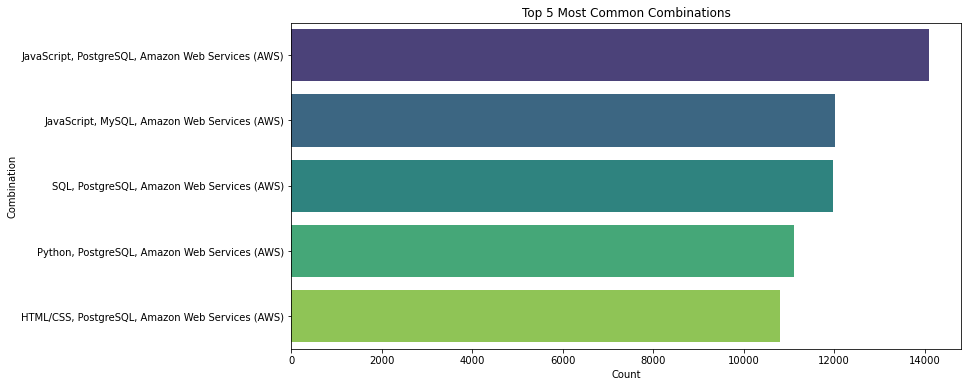

In [79]:
combination_counts = {}

for index, row in df_notna.iterrows():
    languages = row['LanguageHaveWorkedWith'].split(';')
    databases = row['DatabaseHaveWorkedWith'].split(';')
    platforms = row['PlatformHaveWorkedWith'].split(';')
    
    for language in languages:
        for database in databases:
            for platform in platforms:
                combination = f"{language}, {database}, {platform}"
                combination_counts[combination] = combination_counts.get(combination, 0) + 1

sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

# Top 5 most common combinations
print("Top 5 most common combinations:")
top_combinations = sorted_combinations[:5]
for i, (combination, count) in enumerate(top_combinations, start=1):
    print(f"{i}. Combination: {combination}")
    print(f"   Count: {count}")


# Creating a countplot
top_combination_labels = [item[0] for item in top_combinations]
top_combination_counts = [item[1] for item in top_combinations]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_combination_counts, y=top_combination_labels, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Combination")
plt.title("Top 5 Most Common Combinations")
plt.show()

# Question 2: Which programming languages are the most popular among developers who have been coding for more than 5 years, have  development experience past year, and are interested in continuing to work with those languages in the next year?

In [65]:
df_notna2 = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'YearsCode']) #I will use YearsCode here because I am choosing developers who are working as a developer by profession

filtered_df = df_notna2[(df_notna2['YearsCode'].str.isnumeric()) & (df_notna2['LanguageHaveWorkedWith'] != 'NA') & (df_notna2['LanguageWantToWorkWith'] != 'NA') & (df_notna2['MainBranch'] == 'I am a developer by profession')]
filtered_df['YearsCode'] = filtered_df['YearsCode'].astype(int)

language_counts = {}

for index, row in filtered_df.iterrows():
    languages = row['LanguageHaveWorkedWith'].split(';')
    languages_want = row['LanguageWantToWorkWith'].split(';')
    if set(languages).intersection(languages_want) and row['YearsCode'] > 5:
        for language in languages:
            if language in languages_want:
                if language in language_counts:
                    language_counts[language] += 1
                else:
                    language_counts[language] = 1

sorted_languages = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)
top_ten_languages = sorted_languages[:10]

print("Top Ten Languages:")
for language, count in top_ten_languages:
    print(f"{language}: {count}")


Top Ten Languages:
JavaScript: 21171
SQL: 19383
HTML/CSS: 18435
TypeScript: 17742
Python: 16432
Bash/Shell (all shells): 11552
C#: 11377
Java: 7906
Rust: 6108
C++: 5750


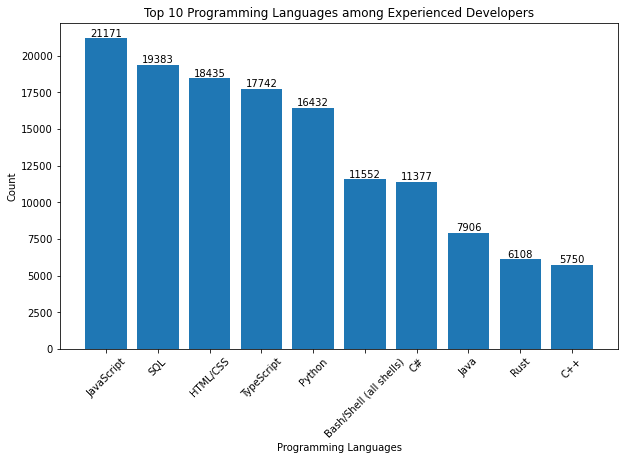

In [67]:
top_languages = []
top_counts = []

for language, count in top_ten_languages:
    top_languages.append(language)
    top_counts.append(count)


plt.figure(figsize=(10, 6))
bars = plt.bar(top_languages, top_counts)
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Top 10 Programming Languages among Experienced Developers')
plt.xticks(rotation=45)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()


# Question 3: Do developers who work with more programming language earn more?

To make correlation analysis I have to choose one country because compensation differs by countries

In [68]:
df_notna3 = df.dropna(subset=['LanguageHaveWorkedWith', 'MainBranch', 'ConvertedCompYearly'])


filtered_df = df_notna3[(df_notna3['YearsCode'].str.isnumeric()) & (df_notna3['LanguageHaveWorkedWith'] != 'NA') & (df_notna3['MainBranch'] == 'I am a developer by profession') & (df_notna3['Country'] == 'United States of America')]
filtered_df['YearsCode'] = filtered_df['YearsCode'].astype(int)

filtered_df['LanguageCount'] = filtered_df['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(';')))

correlation = filtered_df['LanguageCount'].corr(filtered_df['ConvertedCompYearly'])

print("Correlation between the number of programming languages known and total compensation:")
print(correlation)



Correlation between the number of programming languages known and total compensation:
0.042500079711622514


Let's look at the salaries by countries to seek relationship. I have converted currencies into USD in data preparation section.

In [69]:
df_notna4 = df.dropna(subset=['Country', 'MainBranch', 'CompTotal_USD'])


filtered_df = df_notna4[(df_notna4['MainBranch'] == 'I am a developer by profession')]

filtered_data = df[df['CompTotal_USD'] > 150000]
count_by_country = filtered_data.groupby('Country').size().sort_values(ascending=False)

print(count_by_country.head(10))

Country
United States of America                                5553
United Kingdom of Great Britain and Northern Ireland     773
Germany                                                  256
Switzerland                                              252
Netherlands                                              131
Canada                                                   108
France                                                    71
Ireland                                                   66
Spain                                                     49
Australia                                                 40
dtype: int64


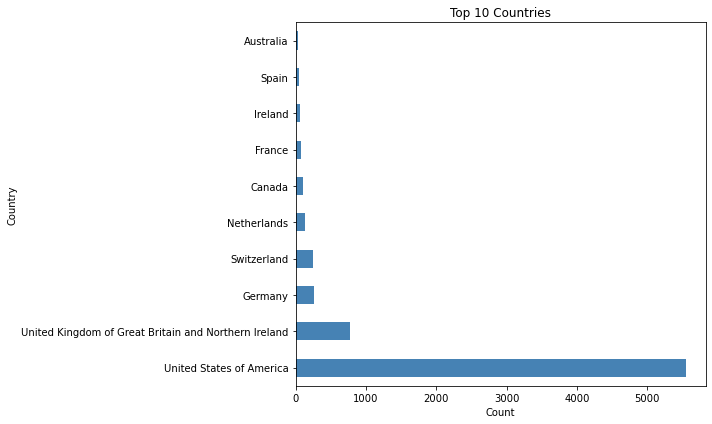

In [70]:
top_10_countries = count_by_country.head(10)

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='barh', color='steelblue')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries')
plt.tight_layout()
plt.show()

Correlation is 0.042. So, we can say that the number of languages a developer knows does not have a noticeable impact on their compensation level but the country they live in does!

# Question 4: Can we predict a developer's annual compensation based on their education level, programming language count, years of professional coding experience, and the size of the organization they work for?

In [71]:
#Here I will choose my target and the categorical and numerical variables for my model.
numeric_cols = ['YearsCodePro']
cat_cols = ['EdLevel','Age','OrgSize']
y = 'ConvertedCompYearly'

In [72]:
def build_linear_regression_model(data, numeric_cols,cat_cols,y):
    '''
    Build and train a linear regression model to predict the target variable (y) based on the input data.

    Parameters:
    - data (DataFrame): The input data containing both numeric and categorical columns.
    - numeric_cols (list): List of column names for numeric features.
    - cat_cols (list): List of column names for categorical features.
    - y (str): The name of the target variable column.

    Returns:
    - r_squared (float): The R-squared score of the linear regression model on the test set.

    This function performs the following steps:
    1. Deletes rows where the target variable (y) is null to ensure the data is valid for analysis.
    2. Fills missing values in numeric columns with the mean of the column.
    3. Label encodes the categorical variables to convert them into numeric representations.
    4. Splits the data into input features (X) and the target variable (y).
    5. Splits the data into training and testing sets.
    6. Builds and trains a linear regression model on the training data.
    7. Predicts the target variable for the test data using the trained model.
    8. Calculates the R-squared score to evaluate the performance of the model.
    
    '''
    # Deleting rows where CompTotal (y) is null
    
    data = data.dropna(subset=[y])

    # Filling numeric values with mean. I choose to fill with mean because this column contains 25% null values.  
    for i in numeric_cols:
        mean_i = data[i].mean()
        data[i].fillna(mean_i,inplace=True)

    # Label encoding the categorical variables column
    le = LabelEncoder()

    for i in cat_cols:
        data[i] = le.fit_transform(data[i])

    # Splitting the data into input (X) and target variable (y)
    X_cols = numeric_cols + cat_cols
    X = data[X_cols]
    
    y = data[y]


    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Building and training the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)

    return r_squared


In [73]:
r_squared = build_linear_regression_model(df, numeric_cols,cat_cols,y)

In [74]:
r_squared

0.03862043589040076

R-squared of model is 0.0386, it means developers' compensation doesn't depend on their education level, programming language count, years of professional coding experience, and the size of the organization they work for.